In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir()[:5]

['.config', 'drive', 'sample_data']

In [0]:
os.chdir('drive/My Drive/')

In [0]:
os.listdir()[:5]

['aashutosh soni',
 'friends.mp3',
 'List of Registered Students.xlsx',
 'List of Registered Students.gsheet',
 '.archivetemp100 Numpy exercises.ipynb.gdoc']

In [0]:
import pickle


with open('./Add_data/data/squat_press.pkl', 'rb') as f:
    data = pickle.load(f)
data = data.reset_index(drop = True)
data['path'] = data['path'].str.replace('Videos','./Videos_sync')

In [0]:
data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
os.listdir('./Add_data/Videos_sync')[:5]

['morayoabiola',
 'abad_fitness',
 'monishka_music',
 'moniquereneefit',
 'monicam.fit']

In [0]:
os.mkdir('temp')
os.chdir('./temp')

In [0]:
!pwd

/content/drive/My Drive/temp


In [0]:
import cv2 
import numpy as np
import math
count = 0

for i in range(0,len(data)):
  videoFile = data['path'][i]
  print(videoFile)
  path = data['path'][i].split('/')[2]
  print(path)
  try:
    os.mkdir(path)
  except:
    pass
  
  
  cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
  frameRate = cap.get(5) #frame rate
  x=1
  while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
      
        filename ="./"+str(path)+"/frame" +str(count)+"cat_"+ str(data['squat'][i])+ str(data['press'][i]) + ".jpg"
        
        count+=1
        cv2.imwrite(filename, frame)
  cap.release()
  print ("Done!")


In [0]:
imgdirs = os.listdir()

imageID= []
classID = []
for imgdir in imgdirs:
  img = (os.listdir(imgdir))
  for i in img:
    imageID.append('./'+imgdir+'/'+i)
    classID.append((int(i.split('.jpg')[0][-2:])%10))
      

In [0]:
for imgdir in imgdirs:
  print(imgdir)
#   img = os.listdir('./'+imgdir)
#   for i in img:
#     print(i)


In [0]:
int(os.listdir('./Andrew Upwork/a_huff12')[0].split('.jpg')[0][-2:])%10

0

In [0]:
df = pd.DataFrame([imageID,classID]).T
df.columns = ['imageID','classID(0->squats/1->press)']
df.to_csv('categorical.csv')

In [0]:
import pandas as pd
df = pd.read_csv('./Add_data/data/categorical.csv')

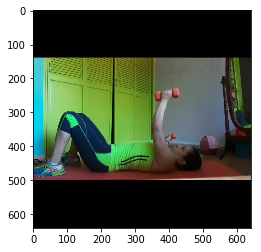

In [0]:
import matplotlib.pyplot as plt

img = plt.imread(df['imageID'][7000])
plt.imshow(img)

In [0]:
import numpy as np

X = []    
for img_name in df['imageID']:
    img = plt.imread(img_name)
    X.append(img)  
X = np.array(X)  


In [0]:
from skimage.transform import resize

image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a) 
X = np.array(image)

In [0]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)    # preparing the validation set

In [0]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer